# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Samuel Yahya
- **Email:** samuelyahya25@gmail.com
- **ID Dicoding:** samuelyahyaa

## Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewa sepeda antara hari kerja dan akhir pekan?
- Bagaimana cuaca dapat mempengaruhi tingkat peminjaman sepeda?

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai day_df

##### 1. Memeriksa tipe data dalam kolom day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### 2. Menghitung Missing Value

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### 3. Menghitung jumlah duplikat

In [6]:
print("Jumlah duplikat:", day_df.duplicated().sum())

Jumlah duplikat: 0


##### 4. Menampilkan ringkasan parameter statistik (mean, min, max, dll)

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai hour_df

##### 1. Memeriksa tipe data dalam kolom hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### 2. Menghitung Missing Value

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### 3. Menghitung jumlah duplikat

In [10]:
print("Jumlah duplikat:", hour_df.duplicated().sum())

Jumlah duplikat: 0


##### 4. Menampilkan ringkasan parameter statistik (mean, min, max, dll)

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cleaning day_df

##### 1. Mengubah tipe data dteday dari object menjadi datetime pada day_df

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Cleaning hour_df

##### 1. Mengubah tipe data dteday dari object menjadi datetime pada hour_df

In [14]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis

### DAY_DF

Mengelompokkan data weekday untuk melihat data instant (indeks) dan count (jumlah)

In [16]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

Mengelompokkan data holiday untuk melihat data instant (indeks) dan count (jumlah) 

In [17]:
day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
})

instant   cnt                                
        nunique   max   min         mean          std
holiday                                              
0           710  8714    22  4527.104225  1929.013947
1            21  7403  1000  3735.000000  2103.350660

Melihat jumlah peminjam sepeda berdasarkan cuaca

In [18]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

### HOUR_DF

Mengelompokkan data weekday untuk melihat data instant (indeks) dan count (jumlah)

In [19]:
hour_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
})

instant  cnt                            
        nunique  max min        mean         std
weekday                                         
0          2502  776   1  177.468825  168.167710
1          2479  968   1  183.744655  179.514167
2          2453  970   1  191.238891  187.820480
3          2475  977   1  191.130505  190.894464
4          2471  976   1  196.436665  188.011923
5          2487  957   1  196.135907  174.076894
6          2512  783   1  190.209793  179.820569

Mengelompokkan data holiday untuk melihat data instant (indeks) dan count (jumlah)

In [20]:
hour_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"],
})

instant  cnt                           
        nunique  max min       mean         std
holiday                                        
0         16879  977   1  190.42858  181.981435
1           500  712   1  156.87000  156.757478

Melihat jumlah peminjam sepeda berdasarkan cuaca

In [21]:
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana perbedaan jumlah penyewa sepeda antara hari kerja dan akhir pekan?

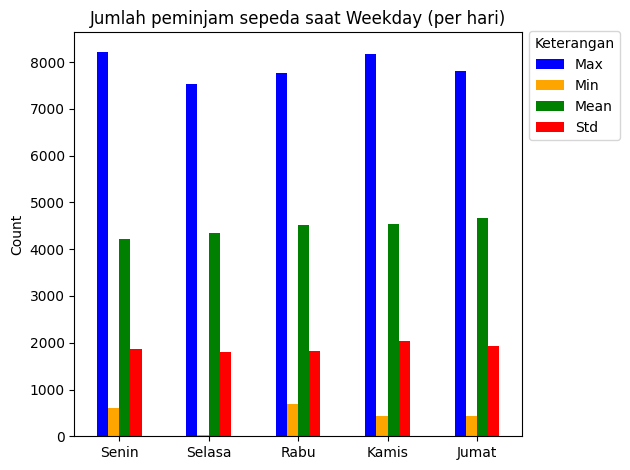

In [22]:
weekday_data = {
    'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'max_cnt': [8227, 7525, 7767, 8173, 7804], 
    'min_cnt': [605, 22, 683, 441, 431],
    'mean_cnt': [4228.828571, 4338.123810, 4510.663462, 4548.538462, 4667.259615], 
    'std_cnt': [1872.496629, 1793.074013, 1826.911642, 2038.095884, 1939.433317],
}

weekday_df = pd.DataFrame(weekday_data)

colors = ['blue', 'orange', 'green', 'red']

weekday_df.plot(kind='bar', stacked=False, color=colors)

plt.title('Jumlah peminjam sepeda saat Weekday (per hari)')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4], ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"], rotation=0)
plt.legend(title='Keterangan', labels=['Max', 'Min', 'Mean', 'Std'], loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

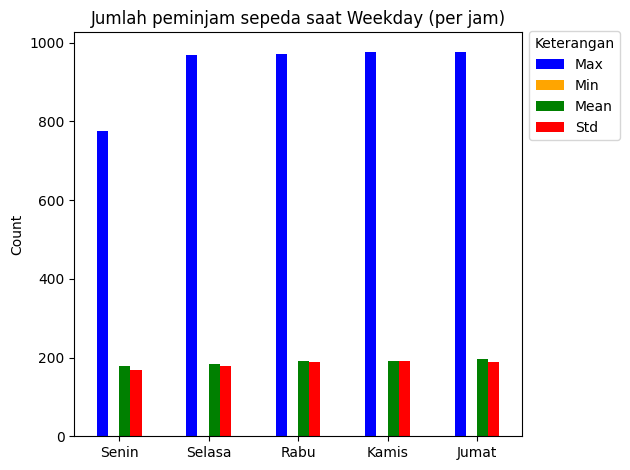

In [23]:
weekday_data = {
  'weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
  'max_cnt': [776, 968, 970, 977, 976],
  'min_cnt': [1, 1, 1, 1, 1],
  'mean_cnt': [177.468825, 183.744655, 191.238891, 191.130505, 196.436665],
  'std_cnt': [168.167710, 179.514167, 187.820480, 190.894464, 188.011923],
}

weekday_df = pd.DataFrame(weekday_data)

# Define colors for each metric
colors = ['blue', 'orange', 'green', 'red']

# Create a single bar plot with multiple metrics
weekday_df.plot(kind='bar', stacked=False, color=colors)

# Customize plot elements
plt.title('Jumlah peminjam sepeda saat Weekday (per jam)')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4], ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"], rotation=0)
plt.legend(title='Keterangan', labels=['Max', 'Min', 'Mean', 'Std'], loc='upper left', bbox_to_anchor=(1, 1.02))
plt.tight_layout()
plt.show()

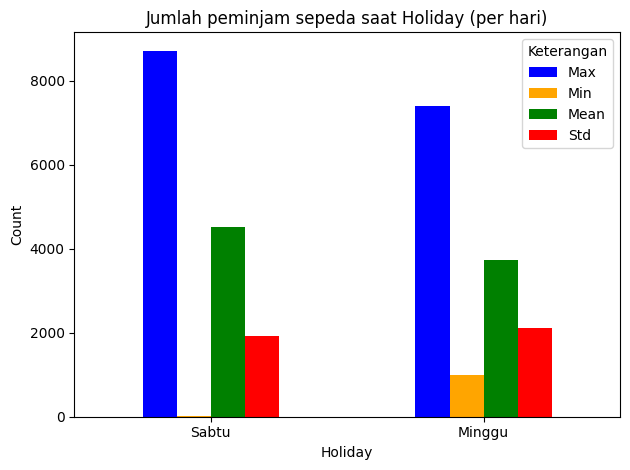

In [24]:
holiday_data = {
    'holiday': ['Saturday', 'Sunday'],
    'max_cnt': [8714, 7403],
    'min_cnt': [22, 1000],
    'mean_cnt': [4527.104225, 3735.000000], 
    'std_cnt': [1929.013947, 2103.350660],
}

holiday_df = pd.DataFrame(holiday_data)

colors = ['blue', 'orange', 'green', 'red']

holiday_df.plot(kind='bar', stacked=False, color=colors)

plt.title('Jumlah peminjam sepeda saat Holiday (per hari)')
plt.ylabel('Count')
plt.xticks([0,1],['Sabtu', 'Minggu'], rotation=0)
plt.xlabel('Holiday')
plt.legend(title='Keterangan', labels=['Max', 'Min', 'Mean', 'Std'])
plt.tight_layout()
plt.show()

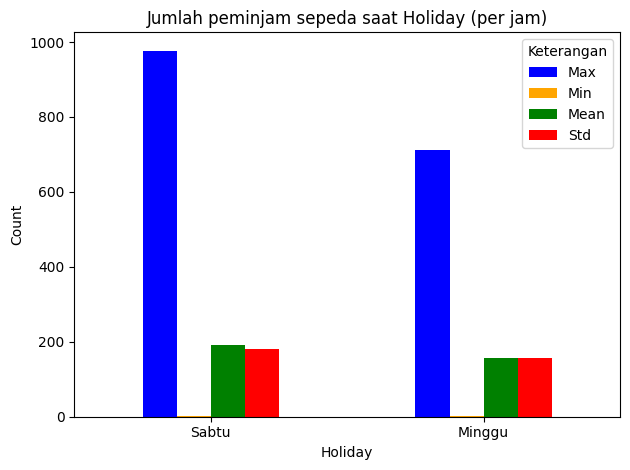

In [25]:
holiday_data = {
  'holiday': ['Saturday', 'Sunday'],
  'max_cnt': [977, 712],
  'min_cnt': [1, 1],
  'mean_cnt': [190.42858, 156.87000],
  'std_cnt': [181.981435, 156.757478],
}

holiday_df = pd.DataFrame(holiday_data)

colors = ['blue', 'orange', 'green', 'red']

holiday_df.plot(kind='bar', stacked=False, color=colors)

plt.title('Jumlah peminjam sepeda saat Holiday (per jam)')
plt.ylabel('Count')
plt.xticks([0,1],['Sabtu', 'Minggu'], rotation=0)
plt.xlabel('Holiday')
plt.legend(title='Keterangan', labels=['Max', 'Min', 'Mean', 'Std'])
plt.tight_layout()
plt.show()

### Bagaimana cuaca dapat mempengaruhi tingkat peminjaman sepeda?

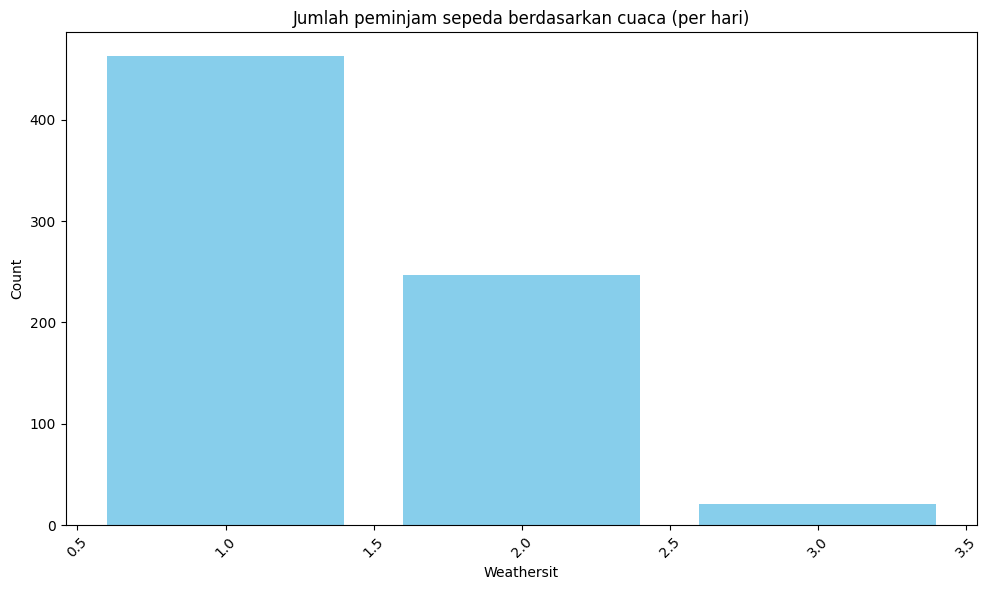

In [26]:
weathersit_counts = day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(weathersit_counts.index, weathersit_counts.values, color='skyblue')
plt.title('Jumlah peminjam sepeda berdasarkan cuaca (per hari)')
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

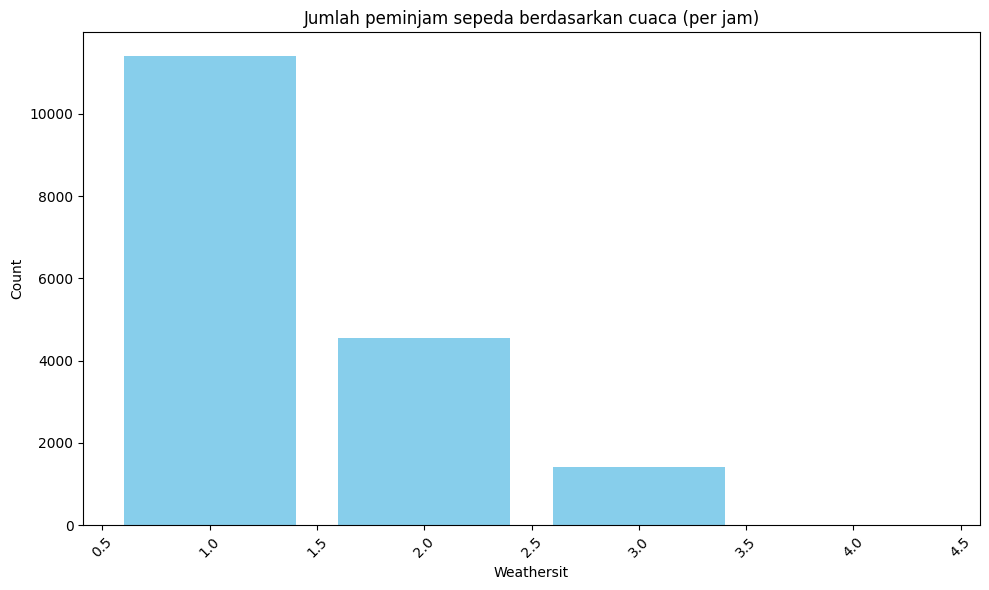

In [27]:
weathersit_counts = hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(weathersit_counts.index, weathersit_counts.values, color='skyblue')
plt.title('Jumlah peminjam sepeda berdasarkan cuaca (per jam)')
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

### Bagaimana perbedaan jumlah penyewa sepeda antara hari kerja dan akhir pekan?

- Pada hari kerja, jumlah peminjam sepeda dalam 1 hari setidaknya mencapai 22 hingga 605, dengan jumlah terbanyak adalah 8227 peminjam dalam 1 hari.
- Pada hari libur, jumlah peminjam sepeda dalam 1 hari setidaknya mencapai 22 hingga 1000, dengan jumlah terbanyak adalah 8714 peminjam dalam 1 hari.

**Bisa disimpulkan bahwa terdapat perbedaan dalam jumlah penyewa sepeda antara hari kerja dan akhir pekan, yaitu pada hari libur, jumlah peminjam sepeda lebih banyak dibandingkan hari kerja.**

## Bagaimana cuaca dapat mempengaruhi tingkat peminjaman sepeda?

Keterangan:

1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian

2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut

3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar

4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

Berdasarkan visualisasi data yang ada, bisa disimpulkan bahwa cuaca dapat mempengaruhi tingkat peminjaman sepeda karena jumlah peminjam sepeda paling banyak ketika cuaca sedang baik, dan jumlah peminjam sepeda paling sedikit ketika cuaca sedang buruk.